In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [4]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/Figure/Figure6/"

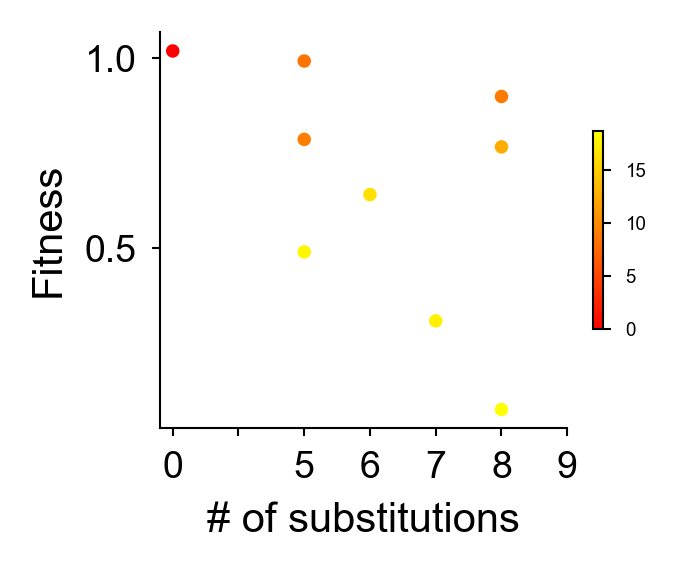

In [5]:
plt.rcParams["figure.dpi"] = 300

original_data = [7,0.641021,16.442]
subet_data = [[6,0.786493,9.18],[6,0.992962,8.519], [6,0.489972,17.981]]
superset_data = [[8,0.308266,17.61],[9,0.766756,12.62],[9,0.899589,9.00200000000001],
                [9,0.074823,18.71]]
wt_data = [0,1.0194867989799998,0]

#plot the result


plt.figure(figsize=(2.5,2))
plt.rcParams["figure.dpi"] = 300
ax = plt.subplot(111)

#plt.figure(figsize=(3.5,3))
ax.scatter(
    [0,2,2,2,3,4,5,5,5],[1.019487,0.786493, 0.992962, 0.489972,0.641021,0.308266,0.766756,0.899589,0.074823],
    c=[0,9.18,8.519, 17.981, 16.442,17.61,12.62,9.00200000000001,18.71],
           cmap="autumn",s=5)
plt.xlim([-0.2,4.2])
plt.yticks(fontsize = 9)
plt.xticks([0,1,2,3,4,5,6],[0,None,5,6,7,8,9],fontsize = 9)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)


ax=plt.gca() 
PCM=ax.get_children()[0]
cbar = plt.colorbar(PCM, ax=ax,shrink=0.5)

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=4.5,length=2,width=0.5)
cbar.outline.set_linewidth(0.5)

plt.xlabel("# of substitutions",fontsize = 10)
plt.ylabel("Fitness",fontsize = 10)
#save figure
plt.tight_layout()
plt.savefig(savedata_dir + "KARS160109PredictComoensaion.png",dpi = 300)

In [6]:
#say that this featur-KARS160109 can predict compensation very well
from ast import literal_eval
subset_featurePredictCompensationData = pd.read_csv(readdata_dir + 'FeaturePredictCompensation/subset/featurePredictCompensation_subset.tsv'
                                                   ,sep = "\t")
feature_Data = subset_featurePredictCompensationData[subset_featurePredictCompensationData["feature"] == 'KARS160109']
correlation_big50List = [ ]
count_big50List = [ ]
cutOff = 50
for single_correlation, single_count in zip(feature_Data["correlation"].values,
                                       feature_Data["sum_count_result"].values):

    single_countN1, single_countN2 = literal_eval(single_count)
    if( single_countN2+single_countN1) >= cutOff:
        count_big50List.append(single_countN1/(single_countN1 + single_countN2))
        correlation_big50List.append(single_correlation)

big50DataInner = pd.DataFrame({"FitnessCorrelation":correlation_big50List,
                     "N1/(N1+N2)":count_big50List})

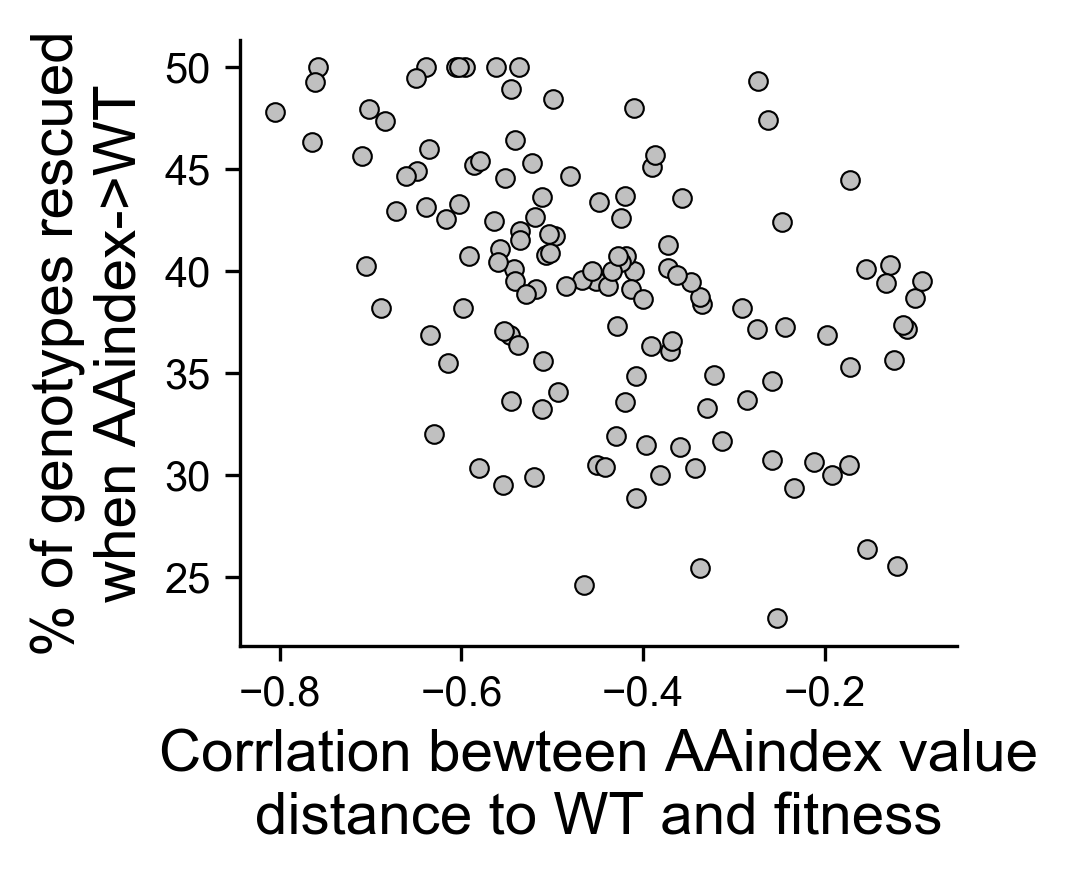

In [8]:
plt.figure(figsize=(3.5,3))
ax = plt.subplot(111)

plt.scatter(big50DataInner["FitnessCorrelation"].values,
           big50DataInner["N1/(N1+N2)"].values*100, s = 20, color = "silver", linewidths=0.5,
           edgecolors = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.8)
    
    

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Corrlation bewteen AAindex value\ndistance to WT and fitness",fontsize = 14)
plt.ylabel("% of genotypes rescued\nwhen AAindex->WT",fontsize = 14)

plt.tight_layout()
plt.savefig(savedata_dir + "KARS160109PredictComoensaion_scatter.png",dpi = 300)

In [12]:
stats.spearmanr(big50DataInner["FitnessCorrelation"].values,
           big50DataInner["N1/(N1+N2)"].values)

SpearmanrResult(correlation=-0.4849820246927433, pvalue=3.789867722586368e-09)